In [2]:
import pandas as pd
import cv2
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import random
import sys
import scipy

In [36]:
class Img():

  def __init__(self, path="", matrix=None):

    if matrix is None:
      self.img = np.array(cv2.cvtColor(cv2.imread(f"imgs/{path}"), cv2.COLOR_BGR2GRAY), dtype=np.float64)
    else:
      self.img = matrix

    self.autovals = []
    self.gauss_img = np.zeros((self.img.shape[0], self.img.shape[1]), dtype=np.float64)
    self.salt_img = np.array(self.img)
    self.U = []
    self.D = []
    self.Vt = []

  def show(self, title=None):
    plt.imshow(self.img, cmap='gray')
    plt.title('Imagem') if title is None else plt.title(title)
    plt.show()

  def svd_numpy(self):
    self.U, self.D, self.Vt = np.linalg.svd(self.img, full_matrices=False)

  def reconstruct_numpy(self, rank, show=False):
    if len(self.U) + len(self.D) + len(self.Vt) == 0:
      self.svd_numpy()

    recon = np.dot(self.U[:, :rank], np.dot(np.diag(self.D[:rank]), self.Vt[:rank, :]))
    if show:
      plt.imshow(recon, cmap='gray')
      plt.title('Imagem reconstruída')
      plt.show()
    return Img(matrix=recon)

  def svd_scipy(self, rank):
    self.U, self.D, self.Vt = scipy.sparse.linalg.svds(self.img, k=rank)

  def reconstruct_scipy(self, rank=None, show=False):
    self.svd_scipy(rank)

    recon = np.dot(self.U, np.dot(np.diag(self.D), self.Vt))
    if show:
      plt.imshow(recon, cmap='gray')
      plt.title('Imagem reconstruída')
      plt.show()
    return Img(matrix=recon)

  def ruido_salt_n_pepper(self, taxa):

    """ Gera uma matriz de rand nas dimensoes da imagem e soma aos valores da representação matricial da imagem """

    altura, largura = self.img.shape
    nS_pixels =  random.randint(100, 100+taxa)
    nP_pixels =  random.randint(100, 100+taxa)

    for i in range(nS_pixels):
      y = random.randint(0, altura - 1)
      x = random.randint(0, largura - 1)

      self.salt_img[y][x] = 255

    for i in range(nP_pixels):
      y = random.randint(0, altura - 1)
      x = random.randint(0, largura - 1)
      self.salt_img[y][x] = 0

    return Img(matrix=self.salt_img)


  def ruido_gaussiano(self, taxa):

    """ Gera uma matriz de rand nas dimensoes da self e soma aos valores da representação matricial da self. """

    altura, largura = self.img.shape
    ruido =  np.random.rand(altura, largura) * taxa

    self.gauss_img = ruido + self.img

    return Img(matrix=self.gauss_img)

  def plot_auto_val(self, rank = True):
    if self.D == []:
      self.svd()

    if rank == True:
        rank = self.D.shape[0]
    self.autovals = [self.D[i] for i in range(rank)]

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(self.autovals)
    plt.yscale('log')
    #ax.plot(10, self.autovals[10], 'ro')
    plt.show()

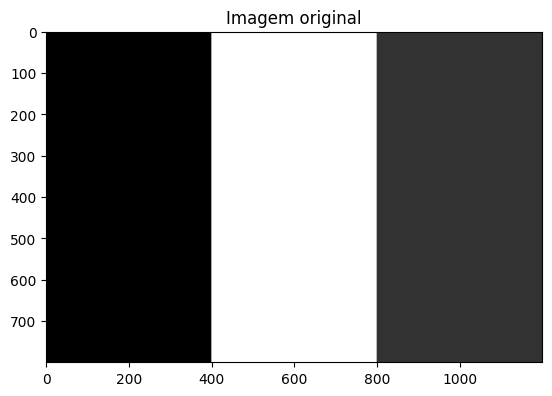

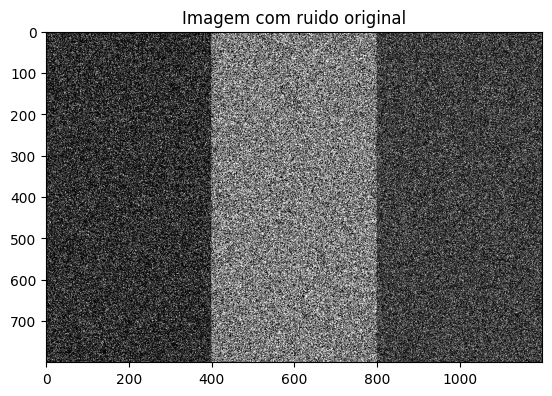

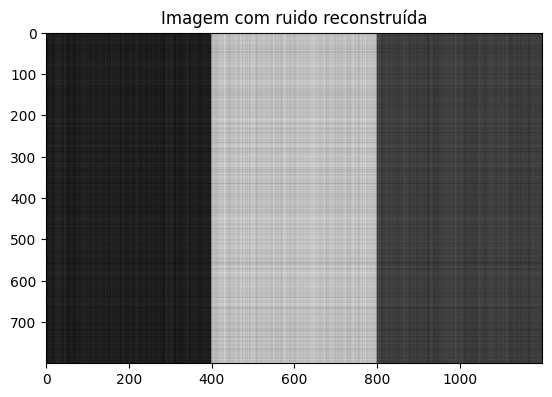

In [38]:
franca = Img(path="franca.png")
franca.show(title="Imagem original")

franca_salt = franca.ruido_salt_n_pepper(800000)
franca_salt.show(title="Imagem com ruido original")

franca_salt_recon = franca_salt.reconstruct_scipy(1)
franca_salt_recon.show(title="Imagem com ruido reconstruída")

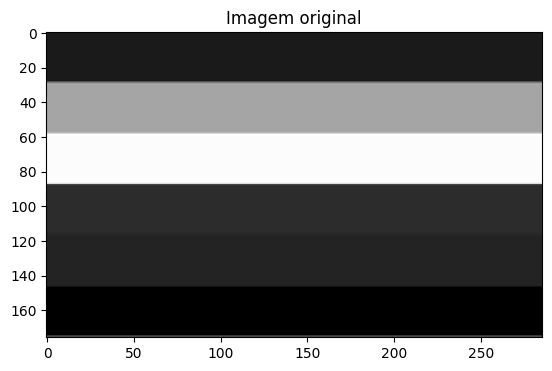

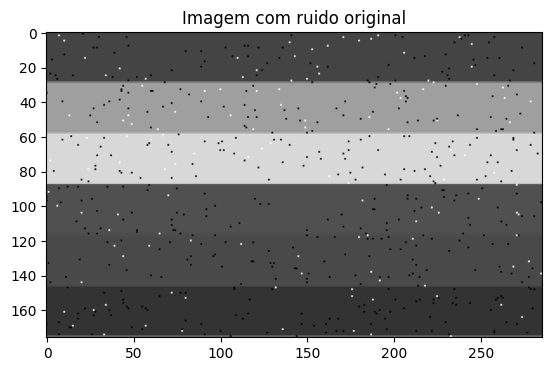

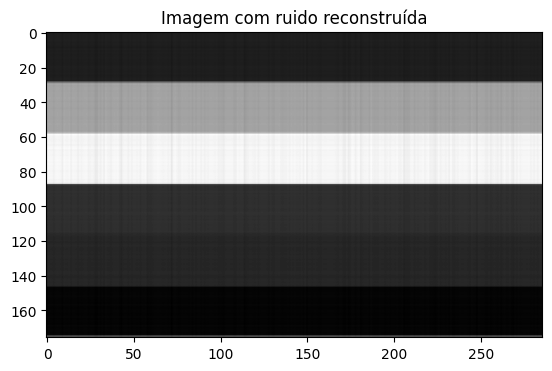

In [39]:
lgbt = Img(path="lgbt.png")
lgbt.show(title="Imagem original")

lgbt_salt = lgbt.ruido_salt_n_pepper(800)
lgbt_salt.show(title="Imagem com ruido original")

lgbt_salt_recon = lgbt_salt.reconstruct_scipy(1)
lgbt_salt_recon.show(title="Imagem com ruido reconstruída")

In [40]:
toalha = Img(path="toalha.jpg")
toalha.show(title="Imagem original")

toalha_1 = toalha.reconstruct_scipy(1)
toalha_1.show(title="Imagem reconstruída com posto ")

toalha_2 = toalha.reconstruct_scipy(1)
toalha_2.show(title="Imagem reconstruída com posto ")

[ WARN:0@8360.386] global loadsave.cpp:248 findDecoder imread_('imgs/brasil.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
